# Cluster Analysis

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
table.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981


In [4]:
stock_list = table['Symbol'].to_list()
stock_list[:10]

['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP']

In [5]:
df =yf.download(stock_list,  start = "2022-01-04" , end = "2022-05-30")
df.head() 

[*********************100%***********************]  504 of 504 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted


Adj Close                                                 \
                     A        AAL         AAP        AAPL        ABBV   
Date                                                                    
2022-01-04  151.190002  19.020000  237.050003  179.699997  132.644516   
2022-01-05  148.600006  18.680000  236.449997  174.919998  133.341309   
2022-01-06  149.119995  18.570000  241.649994  172.000000  132.713211   
2022-01-07  145.149994  19.280001  238.089996  172.169998  132.369736   
2022-01-10  145.160004  18.790001  234.130005  172.190002  133.851639   

                                                                        ...  \
                   ABC        ABMD         ABT         ACN        ADBE  ...   
Date                                                                    ...   
2022-01-04  130.535828  361.589996  134.755692  403.254517  554.000000  ...   
2022-01-05  131.668671  338.200012  134.150253  396.152924  514.429993  ...   
2022-01-06  129.631531  336.440002  134.130386  377.022522  514.119995  ...   
2022-01-07  132.284775  319.279999  134.547256  369.791290  510.700012  ...   
2022-01-10  133.795242  306.799988  134.249496  372.035461  525.830017  ...   

             Volume                                                         \
               WYNN      XEL       XOM     XRAY      XYL      YUM      ZBH   
Date                                                                         
2022-01-04  2292300  4197000  38584000  1438200   925400   935900  1400800   
2022-01-05  3439900  4166000  34033300  1264600  1090200   977900  1895715   
2022-01-06  2583200  2296000  30668500  1986600   703400   862400  1088813   
2022-01-07  1720400  2673100  23985400  1239100   765000   833700  1690230   
2022-01-10  3340000  3760600  22760300  1500100  1062700  1606900  1942065   

                                      
              ZBRA     ZION      ZTS  
Date                                  
2022-01-04  346000  1355900  4664000  
2022-01-05  403700  1113800  4749400  
2022-01-06  338300  1439600  3103400  
2022-01-07  432800  1289200  2206500  
2022-01-10  403400  1577900  2232200  

[5 rows x 3024 columns]

In [6]:
# 1. Returns
returns = round(((df['Adj Close'].iloc[-1,:] - df['Adj Close'].iloc[1,:]) / df['Adj Close'].iloc[1,:]), 2)
df2 = pd.DataFrame(returns)
df2.rename(columns = {0 : 'Returns %'}, inplace = True)
# 2. Standard Deviation 
df2['Std'] = round(df['Adj Close'].std(), 2)
# 3. Range (High - Low)
df2['Range'] = round((df['High'] - df['Low']).mean(), 2)
#resetting index 
df2.reset_index(inplace=True)
#Renaming columns
df2.rename(columns = {"index": "Symbol", 0 : 'Returns %'}, inplace = True)
df2.head()

,Symbol,Returns %,Std,Range
0,A,-0.12,8.69,3.95
1,AAL,-0.03,1.50,0.85
2,AAP,-0.18,14.35,6.71
3,AAPL,-0.14,10.32,4.62
4,ABBV,0.12,10.27,3.38


In [8]:
# The Elbow Method — Finding the optimal number of clusters

X = df2[['Returns %', 'Std', 'Range']].values

In [13]:
# checking for null values
df2[pd.isnull(df2).any(axis=1)]

,Symbol,Returns %,Std,Range
61,BF.B,NaN,NaN,NaN
70,BRK.B,NaN,NaN,NaN
89,CEG,NaN,6.7,2.94


In [14]:
df2 = df2.drop([df2.index[61] , df2.index[70], df2.index[89]])
#confirming there are no null values
df2.isnull().sum()
#output (we are good to go)

Symbol       0
Returns %    0
Std          0
Range        0
dtype: int64

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df2[['Returns %']])
df2['Returns %'] = scaler.transform(df2[['Returns %']])
scaler.fit(df2[['Std']])
df2['Std'] = scaler.transform(df2[['Std']])
scaler.fit(df2[['Range']])
df2['Range'] = scaler.transform(df2[['Range']])

In [22]:
X = df2[['Returns %', 'Std', 'Range']].values
sse = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    sse

In [24]:
sse

[7.921087204548485,
 4.484344414999446,
 3.2547809441246023,
 2.5154904220033845,
 1.8130988646852866,
 1.514508246815069,
 1.283854145943636,
 1.1342873162345133]

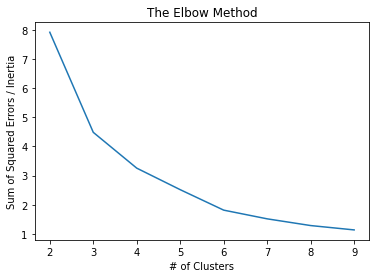

In [27]:
plt.plot(range(2,10), sse)
plt.title('The Elbow Method')
plt.xlabel('# of Clusters')
plt.ylabel('Sum of Squared Errors / Inertia')
plt.show()

In [28]:
km = KMeans(n_clusters = 6)
y_predicted = km.fit_predict(X)
y_predicted
#add the corresponding cluster to each symbol in the dataframe
df2['Cluster'] = y_predicted
df2.head()

,Symbol,Returns %,Std,Range,Cluster
0,A,0.285714,0.018043,0.022852,1
1,AAL,0.333333,0.002067,0.003549,1
2,AAP,0.253968,0.030620,0.040037,1
3,AAPL,0.275132,0.021665,0.027024,1
4,ABBV,0.412698,0.021554,0.019303,2


In [29]:
df2['Cluster'].value_counts()

1    243
2    136
4     93
5     20
0      7
3      2
Name: Cluster, dtype: int64

In [30]:
df2.loc[df2['Cluster'] == 3]

,Symbol,Returns %,Std,Range,Cluster
34,AMZN,0.190476,0.8343,0.648568,3
341,NVR,0.232804,1.0000,1.000000,3


In [31]:
df2.loc[df2['Cluster'] == 0]

,Symbol,Returns %,Std,Range,Cluster
52,AZO,0.354497,0.233362,0.368742,0
65,BKNG,0.317460,0.398640,0.516563,0
103,CMG,0.285714,0.227718,0.344209,0
206,GOOG,0.253968,0.458769,0.466999,0
207,GOOGL,0.253968,0.462169,0.476775,0
321,MTD,0.264550,0.223341,0.271171,0
447,TSLA,0.190476,0.265627,0.333001,0


#AMZN is in the N=2 cluster, while GOOGL and TSLA are in the N=4 cluster. It is possible that the stocks in these clusters truly differ from the other groups. It’s possible that the other clusters aren’t that different from one another.